Aplicação da Regressão Linear (Mercado Financeiro)

In [213]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split, KFold
import matplotlib.pyplot as plt

In [214]:
ticker = "BBAS3.SA"
data = yf.Ticker(ticker).history(period="2y")

del data["Dividends"]
del data["Stock Splits"]

data.dropna()

data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2022-07-05 00:00:00-03:00,14.253600,14.318646,14.023774,14.249265,17375800
2022-07-06 00:00:00-03:00,14.171211,14.344666,13.963066,14.158202,21683600
2022-07-07 00:00:00-03:00,14.288297,14.479096,14.288297,14.366351,19425200
2022-07-08 00:00:00-03:00,14.383692,14.587501,14.335993,14.505111,17998200
2022-07-11 00:00:00-03:00,14.366348,14.444403,14.201566,14.266612,14107400


In [215]:
# Definindo correlação 

correlacao = pd.DataFrame(data)

correlacao_aplicada = correlacao.corr()

# Definindo X e y
X = data['Open'].values
y = data['High'].values

X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

correlacao_aplicada

,Open,High,Low,Close,Volume
Open,1.000000,0.999056,0.998918,0.997733,-0.383003
High,0.999056,1.000000,0.998931,0.999059,-0.369926
Low,0.998918,0.998931,1.000000,0.999113,-0.393817
Close,0.997733,0.999059,0.999113,1.000000,-0.380264
Volume,-0.383003,-0.369926,-0.393817,-0.380264,1.000000


Text(0, 0.5, 'High')

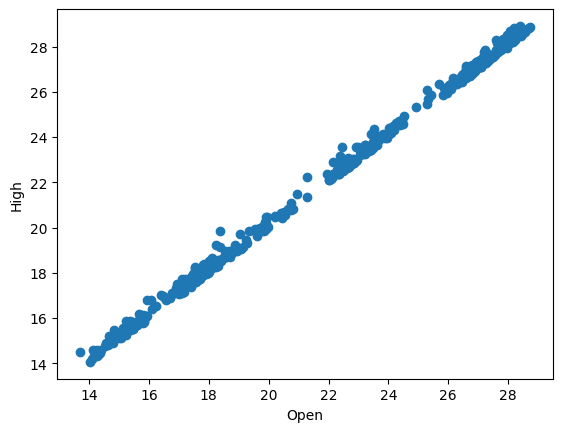

In [216]:
# Mostrar o espalhamento dos dados

plt.scatter(X, y)
plt.xlabel('Open')
plt.ylabel('High')

In [217]:
# Treinamento

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [218]:
# Normalizando os dados

# x_scaler = StandardScaler()
# y_scaler = StandardScaler()

# X_train_scaled = x_scaler.fit_transform(X_train)
# X_test_scaled = x_scaler.fit_transform(X_test)
# y_train_scaled = y_scaler.fit_transform(y_train)
# y_test_scaled = y_scaler.fit_transform(y_test)

In [219]:
# Calculo da Regressão Linear

modelo_regressao = LinearRegression()

modelo_regressao.fit(X_train, y_train)

LinearRegression()

In [220]:
# Realizar Previsões

y_pred = modelo_regressao.predict(X_test)
y_pred

array([[16.18779162],
       [23.18568831],
       [22.6597698 ],
       [27.67563439],
       [24.04279058],
       [15.59459332],
       [28.63220009],
       [22.57468019],
       [19.30682315],
       [17.77725227],
       [24.4170312 ],
       [23.65210457],
       [22.60875889],
       [28.62273028],
       [17.96848699],
       [22.6030075 ],
       [27.35507796],
       [28.36212969],
       [18.38907689],
       [18.20798586],
       [19.84899827],
       [26.6567399 ],
       [23.7453906 ],
       [15.9006144 ],
       [17.81757108],
       [28.26331678],
       [15.97013509],
       [27.6464922 ],
       [15.51006536],
       [22.59844358],
       [27.55420907],
       [15.54717836],
       [15.50284182],
       [18.29250683],
       [26.35889863],
       [26.17634882],
       [22.8040932 ],
       [27.1413748 ],
       [22.66923314],
       [23.45154555],
       [23.5091977 ],
       [17.67441877],
       [27.04423578],
       [20.63408835],
       [19.29271697],
       [14

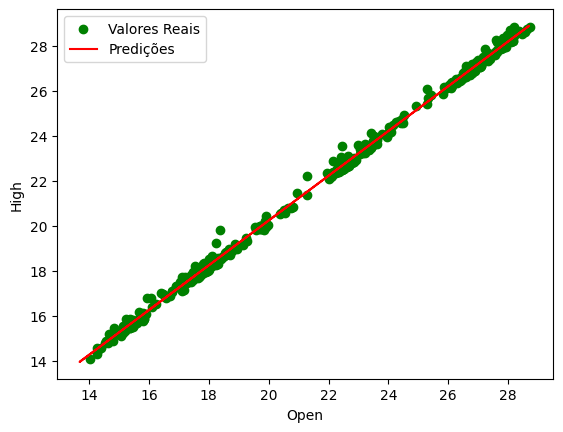

In [221]:
# Grafico Valores Reais x Predições
plt.scatter(X_train, y_train, color='green', label='Valores Reais')
plt.plot(X_test, y_pred, color='red', label='Predições')
plt.xlabel('Open')
plt.ylabel('High')
plt.legend()
plt.show()

In [222]:
# Calculando métricas de avaliação usando os valores na escala original
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Coeficiente de Determinação (R2): {r2}")
print(f"Erro Percentual Absoluto Médio (MAPE): {mape}%")
print(f"Erro Médio Absoluto (MAE): {mae}")
print(f"Erro Quadrático Médio (MSE): {mse}")

Coeficiente de Determinação (R2): 0.9984185695803147
Erro Percentual Absoluto Médio (MAPE): 0.658217189534456%
Erro Médio Absoluto (MAE): 0.136614503719001
Erro Quadrático Médio (MSE): 0.032118855052377625


In [223]:
# Resultados
print("Previsões para os dias seguintes:")
for i, prediction in enumerate(y_pred, start=1):

    print(f"DIA {i:02d} DO DATASET ==> Previsto: {prediction[0]:.2f} || Real: {y_test[i-1][0]:.2f}")

    maiores = 0
    menores = 0
    for i, prediction in enumerate(y_pred):
        if prediction[0] > y_test[i][0]:
            maiores += 1
        if prediction[0] < y_test[i][0]:
            menores += 1

print(f"\nPrevisão maior que o Real: {maiores} de {len(y_test)}")
print(f"Previsão menor que o Real: {menores} de {len(y_test)}")

Previsões para os dias seguintes:
DIA 01 DO DATASET ==> Previsto: 16.19 || Real: 16.08
DIA 02 DO DATASET ==> Previsto: 23.19 || Real: 22.97
DIA 03 DO DATASET ==> Previsto: 22.66 || Real: 22.85
DIA 04 DO DATASET ==> Previsto: 27.68 || Real: 27.55
DIA 05 DO DATASET ==> Previsto: 24.04 || Real: 24.12
DIA 06 DO DATASET ==> Previsto: 15.59 || Real: 15.52
DIA 07 DO DATASET ==> Previsto: 28.63 || Real: 28.46
DIA 08 DO DATASET ==> Previsto: 22.57 || Real: 22.35
DIA 09 DO DATASET ==> Previsto: 19.31 || Real: 19.07
DIA 10 DO DATASET ==> Previsto: 17.78 || Real: 18.09
DIA 11 DO DATASET ==> Previsto: 24.42 || Real: 24.30
DIA 12 DO DATASET ==> Previsto: 23.65 || Real: 23.43
DIA 13 DO DATASET ==> Previsto: 22.61 || Real: 22.56
DIA 14 DO DATASET ==> Previsto: 28.62 || Real: 28.67
DIA 15 DO DATASET ==> Previsto: 17.97 || Real: 17.75
DIA 16 DO DATASET ==> Previsto: 22.60 || Real: 22.59
DIA 17 DO DATASET ==> Previsto: 27.36 || Real: 27.25
DIA 18 DO DATASET ==> Previsto: 28.36 || Real: 28.28
DIA 19 DO DA

In [224]:
# Últimos valores conhecidos
last_known_high = data.iloc[-1]['Open'].reshape(1, -1)  # Último valor de 'Open' para prever o próximo 'High'

predicted_prices_high = []

# Prever os próximos 7 dias
for _ in range(3):
    next_price_high = modelo_regressao.predict(last_known_high)
    
    predicted_prices_high.append(next_price_high[0])
    
    # Atualizar last_known_prices para a próxima previsão
    last_known_high = next_price_high.reshape(1, -1)

print('Predicted prices for the next 3 days:', predicted_prices_high)

Predicted prices for the next 3 days: [array([27.05865269]), array([27.26635222]), array([27.47310334])]


In [225]:
# Últimos valores conhecidos
last_known_high = data.iloc[-1]['High'].reshape(1, -1)  # Último valor de 'Open' para prever o próximo 'High'

predicted_prices_high = []

# Prever os próximos 7 dias
for _ in range(3):
    next_price_high = modelo_regressao.predict(last_known_high)
    
    predicted_prices_high.append(next_price_high[0])
    
    # Atualizar last_known_prices para a próxima previsão
    last_known_high = next_price_high.reshape(1, -1)

print('Predicted prices for the next 3 days:', predicted_prices_high)

Predicted prices for the next 3 days: [array([27.07856182]), array([27.28617044]), array([27.49283106])]
